In [197]:
import os
import re
import sklearn
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn import *
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *

pd.set_option('display.max_columns', None)


In [198]:
districts_info = pd.read_csv('districts_info.csv')

In [199]:
districts_info.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
districts_info.tail()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN
232,7164,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


In [201]:
products_info = pd.read_csv('products_info.csv')

In [202]:
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [203]:
products_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LP ID                       372 non-null    int64 
 1   URL                         372 non-null    object
 2   Product Name                372 non-null    object
 3   Provider/Company Name       371 non-null    object
 4   Sector(s)                   352 non-null    object
 5   Primary Essential Function  352 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.6+ KB


In [204]:
districts_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [205]:
engagement = 'C:/Users/FLUXNATURE/Documents/GitHub/Covid-19-Impact-on-Digital-Learning/engagement_data/'

#for filename in os.listdir(engagement):
    #print(filename)

In [206]:
engagement_1000 = pd.read_csv(engagement + '1000.csv')

In [207]:
engagement_1000.tail()

,time,lp_id,pct_access,engagement_index
103998,2020-12-31,68845.0,0.00,NaN
103999,2020-12-31,28324.0,0.00,NaN
104000,2020-12-31,64947.0,0.00,NaN
104001,2020-12-31,13496.0,0.03,0.26
104002,2020-12-31,79673.0,0.03,0.26


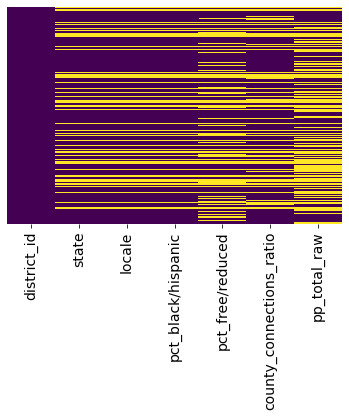

In [208]:
sns.heatmap(districts_info.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [209]:
districts_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


Drop NAN data
Since we cannot work with state with missing values, from the district data above we can only work with 176 states. 

In [210]:
districts_info = districts_info[districts_info.state.notna()].reset_index(drop = True)

In [211]:
districts_info.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
2,5987,Wisconsin,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[10000, 12000["
3,3710,Utah,Suburb,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[6000, 8000["
4,7177,North Carolina,Suburb,"[0.2, 0.4[","[0.2, 0.4[","[0.18, 1[","[8000, 10000["


In [212]:
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [213]:
sectors = products_info['Sector(s)']

In [214]:
sectors.tail(10)

362    PreK-12; Higher Ed; Corporate
363                          PreK-12
364                          PreK-12
365               PreK-12; Higher Ed
366                          PreK-12
367    PreK-12; Higher Ed; Corporate
368    PreK-12; Higher Ed; Corporate
369               PreK-12; Higher Ed
370                              NaN
371                              NaN
Name: Sector(s), dtype: object

In [215]:
class_sectors = products_info['Sector(s)'].str.get_dummies(sep="; ")
class_sectors.columns = [f"sector_{re.sub(' ', '', z)}" for z in class_sectors.columns]

In [216]:
products_info = products_info.join(class_sectors)
products_info.drop("Sector(s)", axis=1, inplace=True)

In [217]:
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,Primary Essential Function,sector_Corporate,sector_HigherEd,sector_PreK-12
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,LC - Digital Learning Platforms,0,0,1
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",LC - Digital Learning Platforms,0,0,1
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC","LC - Sites, Resources & Reference - Games & Si...",0,0,1
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,LC - Digital Learning Platforms,0,1,1
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,LC - Digital Learning Platforms,0,0,1


In [218]:
products_info['primary_function_main'] = products_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[0] if x == x else x)
products_info['primary_function_sub'] = products_info['Primary Essential Function'].apply(lambda x: x.split(' - ')[1] if x == x else x)

# Synchronize similar values
products_info['primary_function_sub'] = products_info['primary_function_sub'].replace({'Sites, Resources & References' : 'Sites, Resources & Reference'})
products_info.drop("Primary Essential Function", axis=1, inplace=True)

In [219]:
products_info.head()

,LP ID,URL,Product Name,Provider/Company Name,sector_Corporate,sector_HigherEd,sector_PreK-12,primary_function_main,primary_function_sub
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,0,0,1,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",0,0,1,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",0,0,1,LC,"Sites, Resources & Reference"
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,0,1,1,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,0,0,1,LC,Digital Learning Platforms


In [220]:
engagement_Path = 'C:/Users/FLUXNATURE/Documents/GitHub/Covid-19-Impact-on-Digital-Learning/engagement_data'

In [221]:
engage_data = []

for district in districts_info.district_id.unique():
    df = pd.read_csv(f'{engagement_Path}/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    engage_data.append(df)
    
    
engagement_new = pd.concat(engage_data)
engagement_new = engagement_new.reset_index(drop=True)


In [222]:
engagement_new.head()

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-27,32213.0,100.00,3000.00,8815
1,2020-02-25,90153.0,33.33,2666.67,8815
2,2020-02-25,99916.0,0.00,NaN,8815
3,2020-02-25,28504.0,0.00,NaN,8815
4,2020-02-25,95731.0,33.33,333.33,8815


In [223]:
type(df['time'].iloc[0])

str

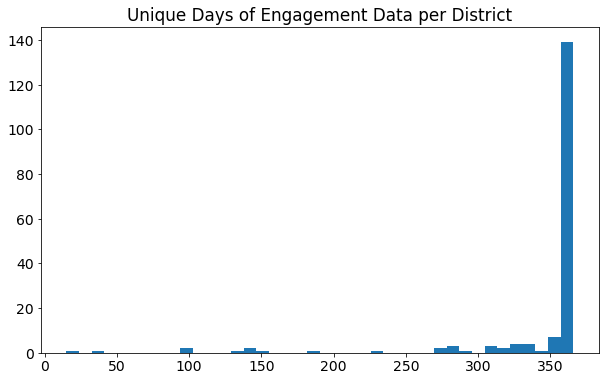

In [224]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

#x = engagement_new.groupby('district_id').time.nunique()
plt.hist(engagement_new.groupby('district_id').time.nunique(), bins= 40)

ax.set_title('Unique Days of Engagement Data per District')
plt.show()


we can create a unique data to determine how many district have less than 366 days of activities 

In [225]:
Unique_366days = engagement_new.groupby('district_id').time.nunique()
Unique_366days.head()


district_id
1000    366
1044    366
1052    366
1142    366
1204    366
Name: time, dtype: int64

To make the data easier to compare, we will only consider distrcits with engagement data for everyday in 2020.

In [226]:

engage_data = []

for district in districts_info.district_id.unique():
    df = pd.read_csv(f'{engagement_Path}/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    if df.time.nunique() == 366:
        engage_data.append(df)
    
    
    
engagement_new = pd.concat(engage_data)
engagement_new = engagement_new.reset_index(drop=True)

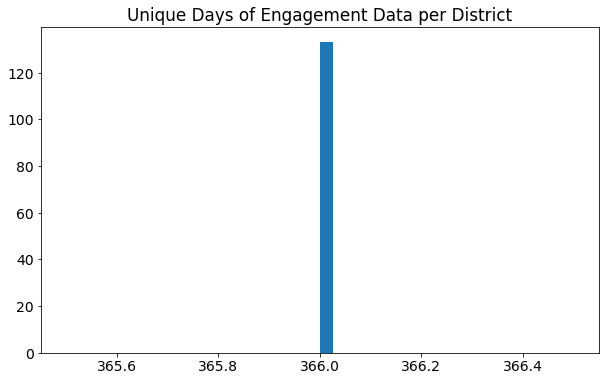

In [227]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

#x = engagement_new.groupby('district_id').time.nunique()
plt.hist(engagement_new.groupby('district_id').time.nunique(), bins= 40)

ax.set_title('Unique Days of Engagement Data per District')
plt.show()

In [228]:
districts_info = districts_info[districts_info.district_id.isin(engagement_new.district_id.unique())].reset_index(drop=True)
products_info = products_info[products_info['LP ID'].isin(engagement_new.lp_id.unique())].reset_index(drop=True)

Furthermore, if we look at a few sample districts, we can quickly see that most districts use more than the 369 unique products from products_info. In fact, the concatenated engagement data contains more than 8000 unique products. Since we don't have any additional information the majority of these products, we will remove engagement data for unknown products. This reduces the engagement data roughly by half.

In [229]:
for district in districts_info.district_id.unique()[:10]:
    df = pd.read_csv(f'{engagement_Path}/{district}.csv', index_col=None, header=0)
    print(f'District {district} uses {df.lp_id.nunique()} unique products.')
    
print(f'\nConcatenated engagement data contains {engagement_new.lp_id.nunique()} unique products.')

District 3710 uses 985 unique products.
District 7177 uses 4913 unique products.
District 9812 uses 5056 unique products.
District 6584 uses 3508 unique products.
District 1044 uses 5593 unique products.
District 7457 uses 4013 unique products.
District 1904 uses 2200 unique products.
District 5527 uses 4055 unique products.
District 7614 uses 4468 unique products.
District 2779 uses 3644 unique products.

Concatenated engagement data contains 8417 unique products.


In [230]:
print(len(engagement_new))
engagement_new = engagement_new[engagement_new.lp_id.isin(products_info['LP ID'].unique())]
print(len(engagement_new))

14913939
7784803


Note that at this stage, we have removed quite a bit of data. This obviously can lead to loss of information. However, on the other hand this makes the data easier to compare and therefore, it can help us in finding insights more quickly. To summarize, we have removed districts without any information on the location and we have removed districts with incomplete data in 2020.

In [231]:
#Finally, we will convert the time column to the type datetime64[ns] for easier handling.
engagement_new.time = engagement_new.time.astype('datetime64[ns]')

Initial Exploratory Data Analysis (EDA)
Let's begin with a simple EDA. First of all, I am interested how diverse the available school districts are. As you can see in below plot, the available data does not cover all the states in the U.S. (19/50). The states with the most available school districts are CT (29) and UT (24) while there are also states with only one school district (FL, TN, NY, AZ).

In [232]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District Of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}


In [239]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

import re

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore")


In [234]:
import cufflinks as cf
cf.go_offline()

In [248]:
districts_info['state_abbrev'] = districts_info['state'].replace(us_state_abbrev)
districts_info_by_state = districts_info['state_abbrev'].value_counts().to_frame().reset_index(drop=False)
districts_info_by_state.columns = ['state_abbrev', 'num_districts']

fig = go.Figure()
layout = dict(
    title_text = "Number of Available School Districts per State",
    geo_scope='usa',
)

fig.add_trace(
    go.Choropleth(
        locations=districts_info_by_state.state_abbrev,
        zmax=1,
        z = districts_info_by_state.num_districts,
        locationmode = 'USA-states', # set of locations match entries in `locations`
        marker_line_color='white',
        geo='geo',
        colorscale=px.colors.sequential.Teal, 
    )
)
            
fig.update_layout(layout)   
fig.show()

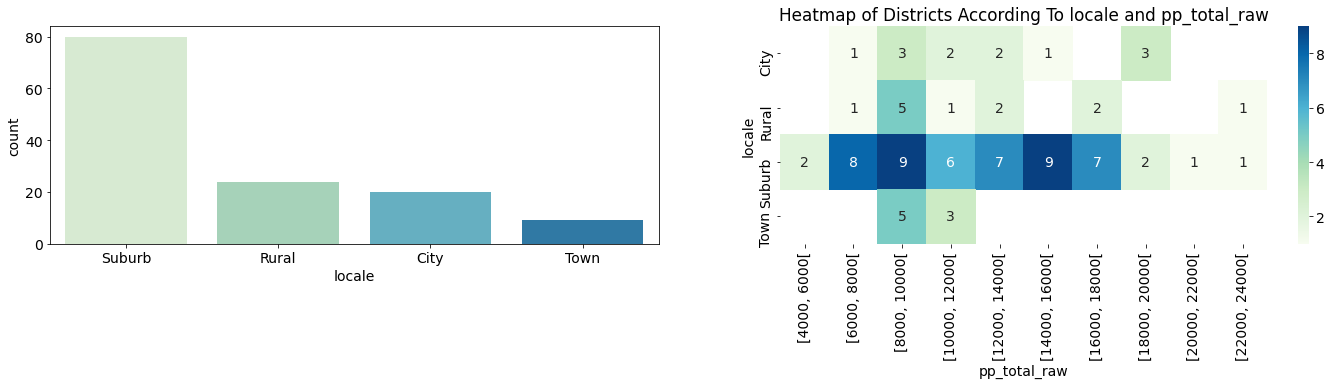

In [236]:
districts_info.pp_total_raw.unique()
temp = districts_info.groupby('locale').pp_total_raw.value_counts().to_frame()
temp.columns = ['amount']

temp = temp.reset_index(drop=False)

temp = temp.pivot(index='locale', columns='pp_total_raw')['amount']
temp = temp[['[4000, 6000[', '[6000, 8000[', '[8000, 10000[', '[10000, 12000[',
       '[12000, 14000[', '[14000, 16000[', '[16000, 18000[', 
       '[18000, 20000[', '[20000, 22000[', '[22000, 24000[', ]]


fig, ax = plt.subplots(1, 2, figsize=(24,4))

sns.countplot(data=districts_info, x='locale', ax=ax[0], palette='GnBu')

sns.heatmap(temp, annot=True,  cmap='GnBu', ax=ax[1])
ax[1].set_title('Heatmap of Districts According To locale and pp_total_raw')
plt.show()


If we look at the distributions of the remaining columns in districts_info, you can quickly see that county_connections_ratio only has one unique value which is [0.18, 1[. To be fair, before dropping all rows without any state information, this column had another value of [1, 2[ but only for one data point. So, this column does not really contain any valuable information. Maybe we can get this sort of information from an external dataset.

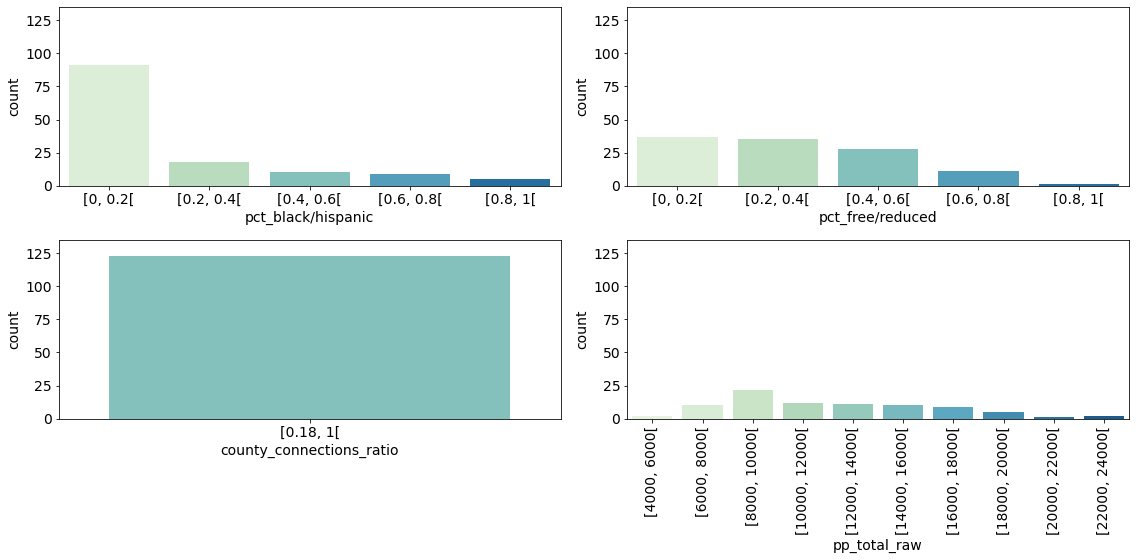

In [237]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

sns.countplot(data=districts_info, x='pct_black/hispanic', order=['[0, 0.2[', '[0.2, 0.4[', '[0.4, 0.6[', '[0.6, 0.8[','[0.8, 1[', ], palette='GnBu', ax=ax[0,0])
ax[0,0].set_ylim([0,135])
sns.countplot(data=districts_info, x='pct_free/reduced', order=['[0, 0.2[', '[0.2, 0.4[', '[0.4, 0.6[', '[0.6, 0.8[','[0.8, 1[', ], palette='GnBu', ax=ax[0,1])
ax[0,1].set_ylim([0,135])

sns.countplot(data=districts_info, x='county_connections_ratio', palette='GnBu', ax=ax[1,0])
ax[1,0].set_ylim([0,135])
sns.countplot(data=districts_info, x='pp_total_raw', order=['[4000, 6000[', '[6000, 8000[', '[8000, 10000[', '[10000, 12000[',
       '[12000, 14000[', '[14000, 16000[', '[16000, 18000[', 
       '[18000, 20000[', '[20000, 22000[', '[22000, 24000[', ], palette='GnBu', ax=ax[1,1])
ax[1,1].set_ylim([0,135])
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()


In [238]:
def replace_ranges_pct(range_str):
    if range_str == '[0, 0.2[':
        return 0.1
    elif range_str == '[0.2, 0.4[':
        return 0.3
    elif range_str == '[0.4, 0.6[':
        return 0.5
    elif range_str == '[0.6, 0.8[':
        return 0.7
    elif range_str == '[0.8, 1[':
        return 0.9
    else:
        return np.nan
    
def replace_ranges_raw(range_str):
    if range_str == '[4000, 6000[':
        return 5000
    elif range_str == '[6000, 8000[':
        return 7000
    elif range_str == '[8000, 10000[':
        return 9000
    elif range_str == '[10000, 12000[':
        return 11000
    elif range_str ==  '[12000, 14000[':
        return 13000
    elif range_str ==  '[14000, 16000[':
        return 15000
    elif range_str == '[16000, 18000[':
        return 17000
    elif range_str ==  '[18000, 20000[':
        return 19000
    elif range_str ==  '[20000, 22000[':
        return 21000
    elif range_str ==  '[22000, 24000[':
        return 21000
    else: 
        return np.nan
    
districts_info['pct_black_hispanic_num'] = districts_info['pct_black/hispanic'].apply(lambda x: replace_ranges_pct(x))
districts_info['pct_free_reduced_num'] = districts_info['pct_free/reduced'].apply(lambda x: replace_ranges_pct(x))
districts_info['pp_total_raw_num'] = districts_info['pp_total_raw'].apply(lambda x: replace_ranges_raw(x))

def plot_state_mean_for_var(col):
    temp = districts_info.groupby('state_abbrev')[col].mean().to_frame().reset_index(drop=False)

    fig = go.Figure()
    layout = dict(
        title_text = f"Mean {col} per State",
        geo_scope='usa',
    )

    fig.add_trace(
        go.Choropleth(
            locations=temp.state_abbrev,
            zmax=1,
            z = temp[col],
            locationmode = 'USA-states', # set of locations match entries in `locations`
            marker_line_color='white',
            geo='geo',
            colorscale=px.colors.sequential.Teal, 
        )
    )

    fig.update_layout(layout)   
    fig.show()

plot_state_mean_for_var('pct_black_hispanic_num')
plot_state_mean_for_var('pct_free_reduced_num')
plot_state_mean_for_var('pp_total_raw_num')